# 1. Business Understanding
2020 Annual Developer Survey examines all aspects of the developer experience from career satisfaction and job search to education and opinions on open source software.

- *survey_results_public.csv* ：CSV file with main survey results, one respondent per row and one column per answer
- *survey_results_schema.csv* ：CSV file with survey schema, i.e., the questions that correspond to each column name

data source: https://insights.stackoverflow.com/survey

Through this data, we can find answers to our wondering about the job of a developer, so that we can better understand the industry and plan our career.

Based on the data, we can ask the following questions:

#### Question 1 : Generally speaking, what factors do people pay more attention to when choosing jobs with the same compensation,benefits, and location?
#### Question 2 : What are the most common programming languages used by data scientists?
#### Question 3 : Which occupations work most heavily overtime?

In the following steps, we will start from processing the data and use descriptive or inferential statistics to find the answers to these questions.

# 2. Data Understanding

### Gather Data

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df_public = pd.read_csv("survey_results_public.csv")
df_scheme = pd.read_csv("survey_results_schema.csv")

In [2]:
df_public.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [4]:
df_scheme.head(10)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
5,CompFreq,"Is that compensation weekly, monthly, or yearly?"
6,CompTotal,What is your current total compensation (salar...
7,ConvertedComp,Salary converted to annual USD salaries using ...
8,Country,Where do you live?
9,CurrencyDesc,Which currency do you use day-to-day? If your ...


### Access data

#### Data for Q1

In [5]:
# Question concerning job factors in the survey
df_scheme[df_scheme['Column']=='JobFactors']['QuestionText'].iloc[0]

'Imagine that you are deciding between two job offers with the same compensation, benefits, and location. Of the following factors, which 3 are MOST important to you?'

In [6]:
# Data for question 1
jobFactors = df_public["JobFactors"].dropna()
jobFactors

0        Languages, frameworks, and other technologies ...
3        Flex time or a flexible schedule;Office enviro...
5        Diversity of the company or organization;Langu...
7        Remote work options;Opportunities for professi...
8        Diversity of the company or organization;Remot...
                               ...                        
64146    Specific department or team I’d be working on;...
64148    Industry that I’d be working in;Languages, fra...
64150    Flex time or a flexible schedule;Languages, fr...
64152    Flex time or a flexible schedule;Languages, fr...
64153    Languages, frameworks, and other technologies ...
Name: JobFactors, Length: 49349, dtype: object

Obviously, the answer to this qusstion is multioptional. So in order to figure out the frequency of each single option, a cleaning method should be implemented. 

#### Data for Q2

In [7]:
# Question concerning the type of job position in the survey
df_scheme[df_scheme['Column']=='DevType']['QuestionText'].iloc[0]

'Which of the following describe you? Please select all that apply.'

In [8]:
# Question concerning programming language in the survey
df_scheme[df_scheme['Column']=='LanguageWorkedWith']['QuestionText'].iloc[0]

'Which programming, scripting, and markup languages have you done extensive development work in over the past year, and which do you want to work in over the next year? (If you both worked with the language and want to continue to do so, please check both boxes in that row.)'

The second question also involves multiple choice questions, and the data should be treated in the same way as the first question requires.

#### Data for Q3

In [9]:
# Question concerning overtime in the survey
df_scheme[df_scheme['Column']=='NEWOvertime']['QuestionText'].iloc[0]

'How often do you work overtime or beyond the formal time expectation of your job?'

In [10]:
# Data for question 3
df_job_overtime = df_public[["DevType","NEWOvertime"]].dropna().reset_index(drop=True)
df_job_overtime.head()

,DevType,NEWOvertime
0,"Developer, desktop or enterprise applications;...",Often: 1-2 days per week or more
1,"Designer;Developer, front-end;Developer, mobile",Never
2,"Developer, back-end;Developer, front-end;Devel...",Sometimes: 1-2 days per month but less than we...
3,"Developer, back-end;Developer, desktop or ente...",Occasionally: 1-2 days per quarter but less th...
4,"Developer, full-stack",Occasionally: 1-2 days per quarter but less th...


Similar to the data in Q1, the answer to the job type question is also multioptional, while for the overtime question, it's single choice. Although the idea of cleaning this data has some commons with that of Q1, there are differences when it comes to datails, since data of Q3 concerning 2 columns.

# 3. Prepare Data (Cleaning)

### Method of cleaning a single column

In [11]:
def clean_multioptional (df,col_name,list_possible_values):
    '''
    PACKAGE
        @import pandas as pd
    INPUT
        @df : the dataframe the contains the aimed column
        @col_name :  the name of the aimed colomn
        @list_possible_values : list of string; contains the possible values of new data
    OUTPUT:
        @traited dataframe colomn
    '''
    counted_df = df[col_name].value_counts().reset_index()
    counted_df.rename(columns={"index":"variable",col_name:"count"},inplace=True)
    
    lst_factors = []
    for factor in list_possible_values:
        count=0
        for i in range(counted_df.shape[0]):
            if factor in counted_df["variable"][i]:
                count += counted_df["count"][i]
        lst_factors.append([factor,count])
    df_factors = pd.DataFrame(lst_factors,columns=["Variable","Count"]).sort_values(by="Count",ignore_index=True,ascending=False)
    
    return df_factors
        

### Method of cleaning data with 2 columns

In [18]:
def count_case_of_each_type(df,type_name,list_type,case_name,list_case):
    '''
    PACKAGE
        @import pandas as pd 
    INPUT
        @df : the dataframe the contains the aimed columns, where the "type" colomn is to be cleaned
        @type_name : str, the name of the colomn to be cleaned. Generally, the value of colomn is a string combines several types  
        @list_type : a list of possible value of the colomn `type_name`. In other word, the value of `type_name` colomn will be seperated into the value in `list_type` and be counted.
                     Besides, this list will be the index of output dataframe
        @case_name : str,the name of the colomn of cases to be counted.
        @list_case : a list of possible value of cases, which will be the colomn name of the output dataframe
    OUTPUT
        @ a dataframe with the index being `list_name` and colomn being `list_case`, and its value is the count of case of each type
    '''
    df_cleaned = clean_multioptional(df,type_name,list_type)
    df_output = df_cleaned.rename(columns={"Variable":type_name}).set_index([type_name])
    for case in list_overtime:
        df_output[case]=0
        
    df_grouped =  df.groupby(by=[case_name])
    
    for group in df_grouped:
        case = group[0]
        series_types = group[1][type_name]
        for i in range(len(series_types)):
            types = (series_types.iloc[i]).split(';')
            df_output.loc[types,case] += 1

    return df_output           
    

#### Cleaning for Q1

In [14]:
possible_values = ["Remote work options","Remote work options","Financial performance or funding status of the company or organization",
                   "Opportunities for professional development","Diversity of the company or organization",
                   "How widely used or impactful my work output would be","Industry that I’d be working in",
                   "Specific department or team I’d be working on","Flex time or a flexible schedule",
                   "Languages, frameworks, and other technologies I’d be working with","Family friendliness"]
df_jobFactors = clean_multioptional(df_public,"JobFactors",possible_values)
df_jobFactors

,Variable,Count
0,"Languages, frameworks, and other technologies ...",25334
1,Flex time or a flexible schedule,21656
2,Opportunities for professional development,20421
3,Remote work options,16411
4,Remote work options,16411
5,How widely used or impactful my work output wo...,10277
6,Industry that I’d be working in,7574
7,Family friendliness,5986
8,Financial performance or funding status of the...,5892
9,Specific department or team I’d be working on,5805


#### Cleaning for Q2

In [16]:
# Find the lines where there exits "data scientist" in the "DevType" column
df_DS = df_public.dropna(subset=["DevType"])
df_DS = df_DS[df_DS["DevType"].str.contains("Data scientist")]

# Cleaning
possible_languages = ["Assembly","Bash/Shell/PowerShell","C","C#","C++","Dart","Go","Haskell","HTML/CSS",
                      "Java","JavaScript","Julia","Kotlin","Objective-C","Perl","PHP","Python","R","Ruby",
                      "Rust","Scala","SQL","Swift","TypeScript","VBA"]
df_language = clean_multioptional(df_DS,"LanguageWorkedWith",possible_languages)
df_language

,Variable,Count
0,Python,3124
1,C,2629
2,Java,2374
3,SQL,2331
4,JavaScript,1925
5,HTML/CSS,1924
6,Bash/Shell/PowerShell,1578
7,R,1416
8,C++,1188
9,C#,851


#### Cleaning for Q3

In [19]:
list_jobs = ["Academic researcher","Data or business analyst","Data scientist or machine learning specialist","Database administrator",
            "Designer","Developer, back-end","Developer, desktop or enterprise applications","Developer, embedded applications or devices",
            "Developer, front-end","Developer, full-stack","Developer, game or graphics","Developer, mobile","Developer, QA or test",
            "DevOps specialist","Educator","Engineer, data","Engineer, site reliability","Engineering manager","Marketing or sales professional",
            "Product manager","Scientist","Senior executive/VP","System administrator"]
list_overtime = ["Never","Rarely: 1-2 days per year or less","Occasionally: 1-2 days per quarter but less than monthly",
                "Sometimes: 1-2 days per month but less than weekly","Often: 1-2 days per week or more"]

df_job_overtime_cleaned = count_case_of_each_type(df_job_overtime,"DevType",list_jobs,"NEWOvertime",list_overtime) 
df_job_overtime_cleaned

,Count,Never,Rarely: 1-2 days per year or less,Occasionally: 1-2 days per quarter but less than monthly,Sometimes: 1-2 days per month but less than weekly,Often: 1-2 days per week or more
DevType,,,,,,
"Developer, full-stack",24110,2623,3582,5325,6377,6203
"Developer, back-end",24092,2533,3598,5271,6485,6205
"Developer, front-end",15897,1739,2428,3450,4143,4137
"Developer, desktop or enterprise applications",10445,1074,1506,2195,2775,2895
"Developer, mobile",8074,852,1115,1694,2098,2315
DevOps specialist,5490,401,697,1186,1571,1635
Database administrator,4996,382,629,939,1342,1704
System administrator,4453,308,521,834,1274,1516
Designer,4263,449,622,806,1062,1324


# 4. Visualize & Evaluate the Results

## Question 1. What factors do people pay more attention to when choosing jobs?

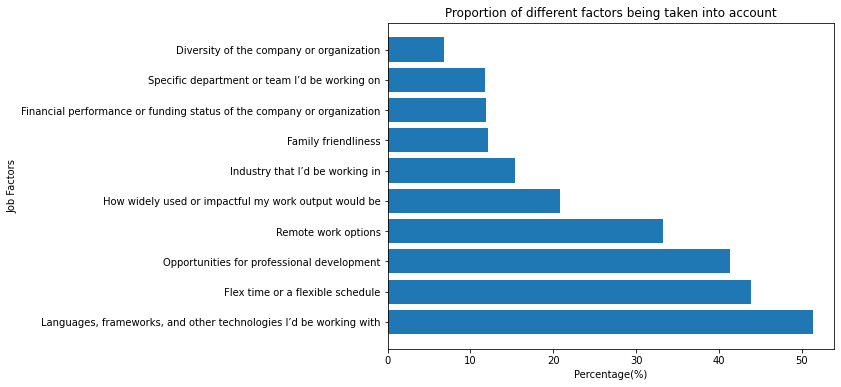

In [24]:
plt.figure(figsize=(8,6))
plt.barh(df_jobFactors['Variable'],100*df_jobFactors['Count']/jobFactors.shape[0])
plt.ylabel('Job Factors')
plt.xlabel('Percentage(%)')
plt.title("Proportion of different factors being taken into account")
plt.show()

Obviously, *Languages, frameworks and other technologies that developer uses* is the most common factor that influences job selection. The next three factors, which are also very frequent, are related to work environment and development opportunities. In contrast, the political and economic macro environment of a company, like *diversity*, *financial performance* or *funding status*, is less important in a developer’s career choice.

## Question 2. Basic facts about data scientist and the most common programming languages that they use ?

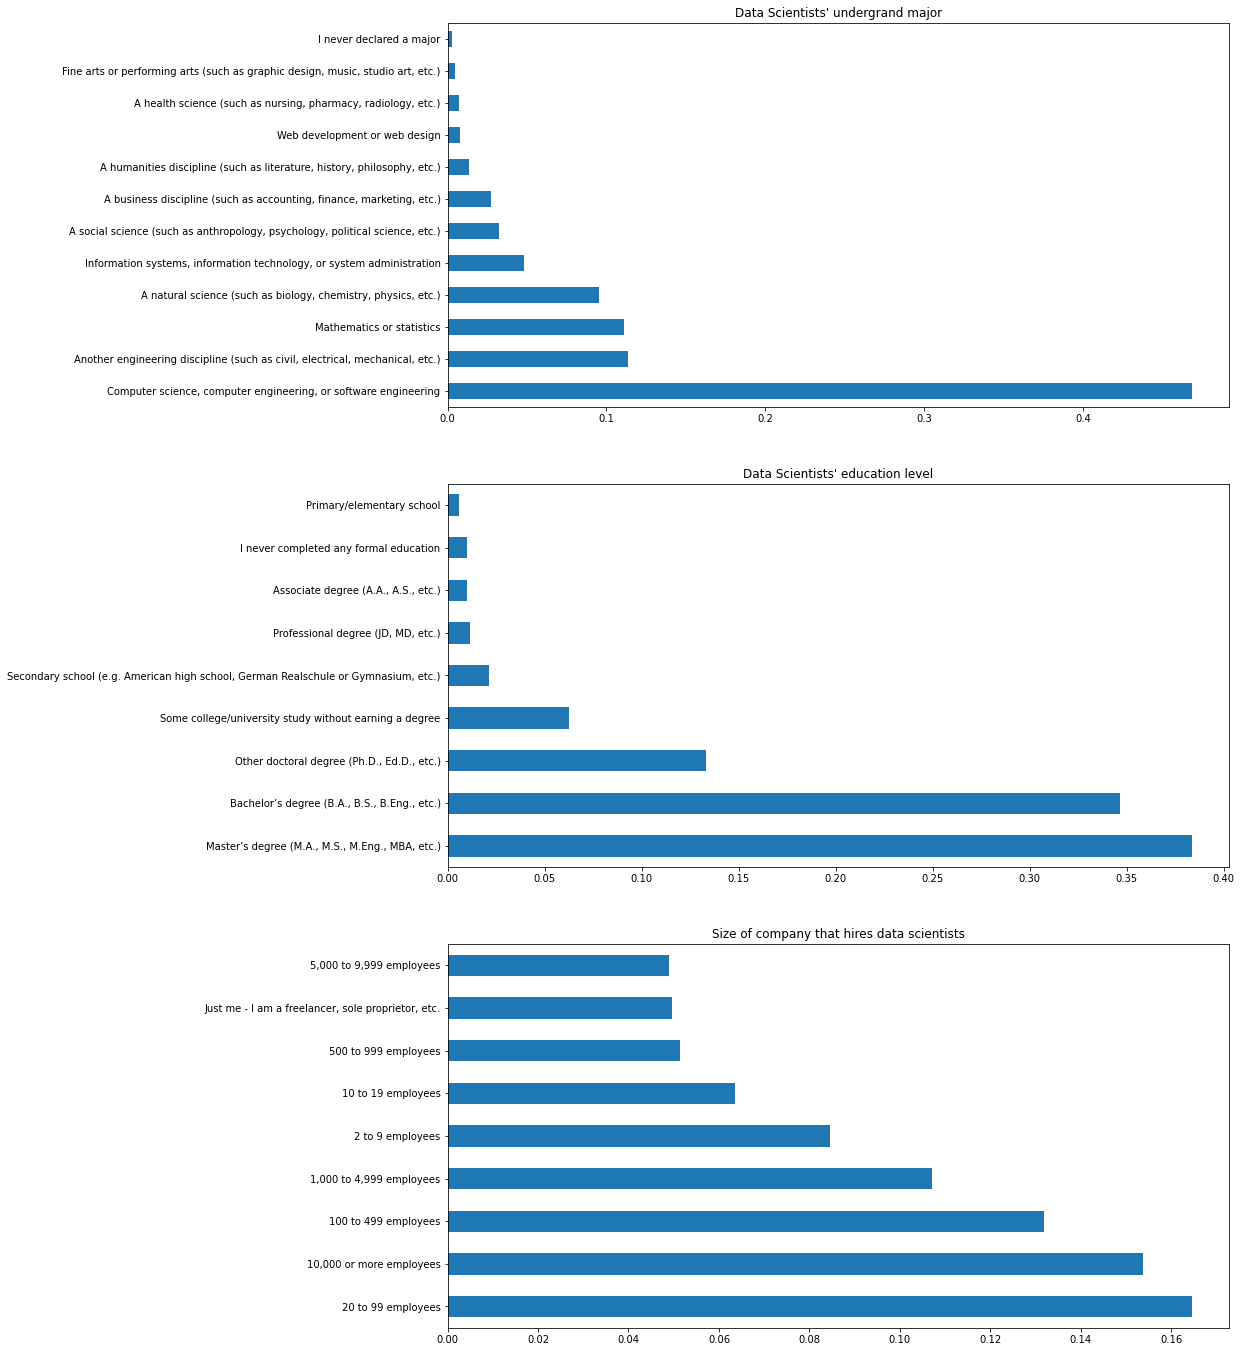

In [23]:
n = df_DS.shape[0]

# Basic Facts about data scientists
plt.figure(figsize=(14,24))
plt.subplot(3,1,1)
(df_DS["UndergradMajor"].value_counts()/n).plot(kind="barh",title="Data Scientists' undergrand major")
plt.subplot(3,1,2)
(df_DS["EdLevel"].value_counts()/n).plot(kind="barh",title="Data Scientists' education level")
plt.subplot(3,1,3)
(df_DS["OrgSize"].value_counts()/n).plot(kind="barh",title="Size of company that hires data scientists")
plt.show()

From the figure above, a dominant number of computer science related graduates can be seen in the domain of data science. And most of the people who switch into data science come from engineering, mathematics and statistics, and the natural sciences.

In addition, more than 85% of data scientists have higher education (bachelor’s and higher), with the largest number of people with a master’s degree (38%).

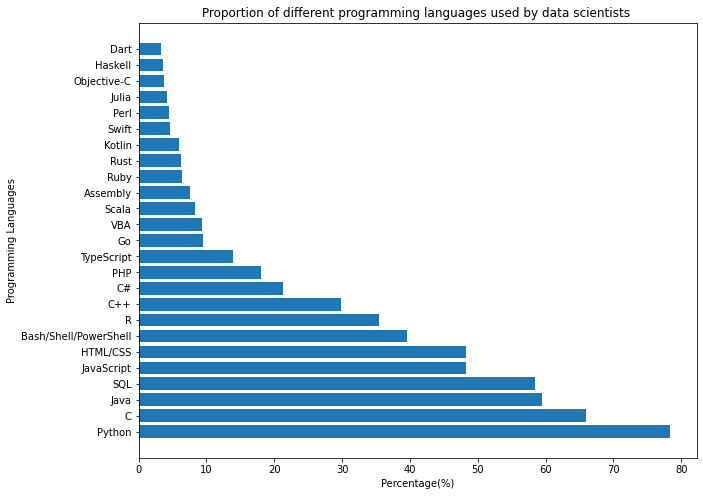

In [25]:
plt.figure(figsize=(10,8))
plt.barh(df_language['Variable'],100*df_language['Count']/n)
plt.ylabel('Programming Languages')
plt.xlabel('Percentage(%)')
plt.title("Proportion of different programming languages used by data scientists ")
plt.show()

The most used languages are *Python*, *C*, *Java* and *SQL* in descending order. It is worth noting that front-end languages like *JavaScript* and *HTML/CSS* are also used relatively often in the work of data scientists.

## Question 3. Which occupations work most heavily overtime?

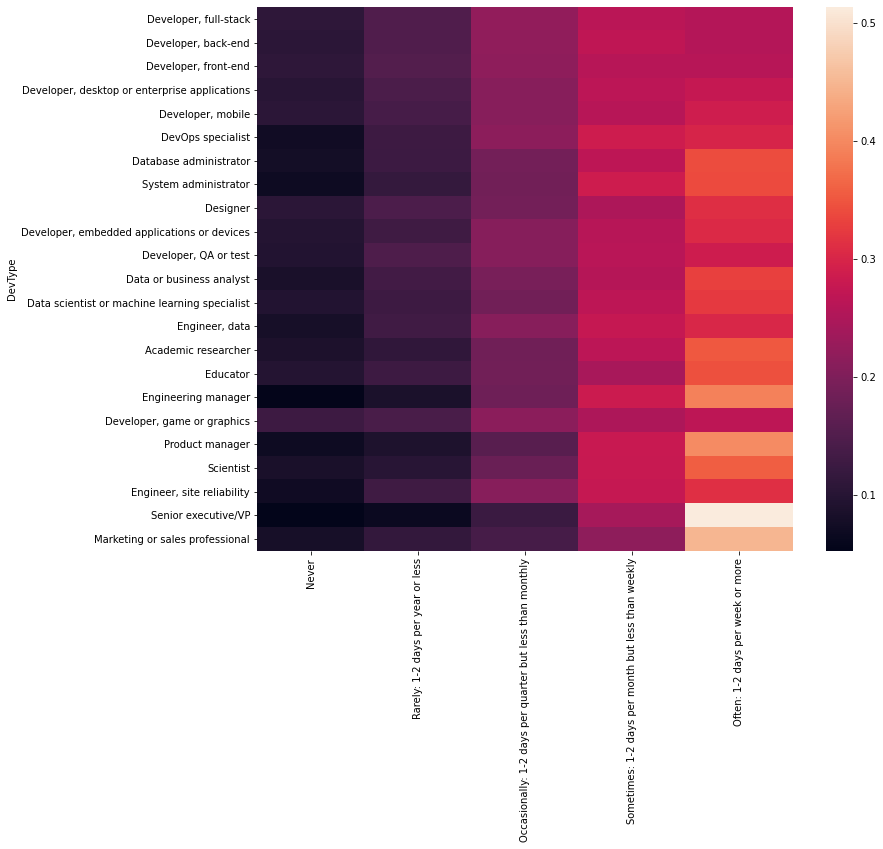

In [26]:
# Turn "Counts" to "percentaeg"
df_radio = df_job_overtime_cleaned.drop(["Count"],axis=1)
df_radio = df_radio.div(df_job_overtime_cleaned["Count"],axis=0)

# Draw Heatmap
fig = plt.figure(figsize=(12,10))
sns_plot = sns.heatmap(df_radio)
plt.show()

It’s a sad conclusion that frequent overtime is always more common for developers, regardless of their specific profession. And it’s easy to see that managers and salespeople are the most likely victims of frequent overtime, while game and graphics developers have the most comfortable schedules in comparison.